In [3]:
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 1.9 MB/s eta 0:00:00


In [4]:
#Importar paquetes necesarios para visualizar y manipular datos
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch, Pitch
from highlight_text import ax_text, fig_text
# matplotlib para hacer gráficas en python
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

In [5]:
# Tabla de las competiciones abiertas de StatsBomb
free_competitions = sb.competitions()
free_competitions

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
65,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
66,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
67,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
68,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


In [6]:
#Cogemos todos los partidos del Mundial 2022
mundial_2022 = sb.matches(competition_id=43, season_id=106)
mundial_2022

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3857265,2022-11-22,18:00:00.000,International - FIFA World Cup,2022,Mexico,Poland,0,0,available,...,2023-04-27T00:49:30.005344,1,Group Stage,Stadium 974,Chris Beath,Gerardo Daniel Martino,Czesław Michniewicz,1.1.0,2,2
60,3857262,2022-12-02,17:00:00.000,International - FIFA World Cup,2022,South Korea,Portugal,2,1,available,...,2023-04-26T23:48:08.999798,3,Group Stage,Education City Stadium,Facundo Tello Figueroa,Paulo Jorge Gomes Bento,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
61,3857261,2022-11-29,21:00:00.000,International - FIFA World Cup,2022,Wales,England,0,3,available,...,2023-04-27T00:02:44.241621,3,Group Stage,Ahmad bin Ali Stadium,Slavko Vinčić,Robert Page,Gareth Southgate,1.1.0,2,2
62,3857255,2022-12-01,21:00:00.000,International - FIFA World Cup,2022,Japan,Spain,2,1,available,...,2023-04-26T23:51:48.352990,3,Group Stage,Sheikh Khalifa International Stadium,Victor Miguel de Freitas Gomes,Hajime Moriyasu,Luis Enrique Martínez García,1.1.0,2,2


In [7]:
#Filtramos solo por los partidos de Argentina
partidos_argentina = mundial_2022.loc[(mundial_2022['home_team'] == 'Argentina') | (mundial_2022['away_team'] == 'Argentina')]
partidos_argentina

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
6,3869321,2022-12-09,21:00:00.000,International - FIFA World Cup,2022,Netherlands,Argentina,2,2,available,...,2023-06-21T17:51:12.511460,5,Quarter-finals,Lusail Stadium,Antonio Miguel Mateu Lahoz,Louis van Gaal,Lionel Sebastián Scaloni,1.1.0,2,2
9,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,...,2023-08-17T15:55:15.164685,7,Final,Lusail Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Didier Deschamps,1.1.0,2,2
11,3857264,2022-11-30,21:00:00.000,International - FIFA World Cup,2022,Poland,Argentina,0,2,available,...,2023-07-25T09:10:13.832053,3,Group Stage,Stadium 974,Danny Desmond Makkelie,Czesław Michniewicz,Lionel Sebastián Scaloni,1.1.0,2,2
13,3857289,2022-11-26,21:00:00.000,International - FIFA World Cup,2022,Argentina,Mexico,2,0,available,...,2023-06-20T11:57:08.547882,2,Group Stage,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Gerardo Daniel Martino,1.1.0,2,2
19,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,...,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Zlatko Dalić,1.1.0,2,2
37,3857300,2022-11-22,12:00:00.000,International - FIFA World Cup,2022,Argentina,Saudi Arabia,1,2,available,...,2023-06-19T15:59:46.628887,1,Group Stage,Lusail Stadium,Slavko Vinčić,Lionel Sebastián Scaloni,Hervé Renard,1.1.0,2,2


In [8]:
#Opcion para visualizar todas las columnas y/o filas de una base de datos muy grande
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [9]:
#Queremos el partido de la final específicamente
argentina_francia = sb.events(match_id=3869685)
argentina_francia

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0584ee21-e3dd-4d9f-95a0-5b5e84be25c3,1,NaN,NaN,3869685,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Argentina,779,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b32679f8-942e-4122-96a2-015caf75e628,2,NaN,NaN,3869685,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Argentina,779,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,771,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,954f6855-de22-46a2-8d09-6fe94eec2b9b,3,NaN,NaN,3869685,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Argentina,779,[6404a8e8-afaf-489d-b65e-173a237ffed5],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6404a8e8-afaf-489d-b65e-173a237ffed5,4,NaN,NaN,3869685,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Argentina,779,[954f6855-de22-46a2-8d09-6fe94eec2b9b],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e84fb5b3-270f-4427-bf97-1a6eaec7285f,1752,NaN,NaN,3869685,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Free Kick,NaN,NaN,NaN,79,France,771,[3e8de8c9-8be8-4921-96ec-1a29ce8fd3d4],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [10]:
#Estas son todas las columnas que tiene nuestra base de datos
argentina_francia.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [11]:
#Filtramos solo acciones de tipo Pase en el partido específico
acciones = argentina_francia['type'].unique()
acciones


array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Offside',
       'Substitution', 'Tactical Shift', 'Shield', '50/50', 'Half End',
       'Bad Behaviour'], dtype=object)

In [12]:
argentina_francia['type'].unique()
pases = argentina_francia[argentina_francia['type'] == 'Pass']

In [13]:
pases['location']

12       [61.0, 40.1]
13       [49.7, 43.6]
14       [22.7, 80.0]
15       [41.1, 73.9]
16       [24.7, 59.4]
            ...      
1270    [109.3, 61.6]
1271      [6.0, 36.0]
1272     [46.5, 20.1]
1273     [47.1, 27.3]
1274     [63.4, 36.1]
Name: location, Length: 1263, dtype: object

In [14]:
#Creamos columnas nuevas x e y y las llenamos separando las coordenadas de la columna location
#Series es un array de una dimension que permite separar los valores que haya con comas.
#Creamos columnas pass_end_x y pass_end_y que tienen las coordenadas de donde acaba el pase. La columna original era pass_end_location y la hemos dividido en dos
pases[['x', 'y']] = pases['location'].apply(pd.Series)
pases[['pass_end_x', 'pass_end_y']] = pases['pass_end_location'].apply(pd.Series)
pases
#Estas nuevas columnas se han agregado AL FINAL de la base de datos


<ipython-input-14-51c302f89571>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases[['x', 'y']] = pases['location'].apply(pd.Series)
<ipython-input-14-51c302f89571>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases[['x', 'y']] = pases['location'].apply(pd.Series)
<ipython-input-14-51c302f89571>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f651a6c4-55e3-4e0f-a178-59414ba83d6a,5,NaN,"[61.0, 40.1]",3869685,0,NaN,NaN,NaN,2.907503,NaN,Left Foot,NaN,NaN,"[48.0, 43.2]",NaN,Ground Pass,NaN,13.364505,NaN,NaN,Aurélien Djani Tchouaméni,10481.0,NaN,NaN,NaN,NaN,Kick Off,1,From Kick Off,Antoine Griezmann,5487.0,Center Attacking Midfield,2,France,771,[97b5dc82-547a-4f93-a632-a2a8daf5ac98],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.578,Pass,NaN,61.0,40.1,48.0,43.2
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.179173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a5956ecc-d637-44d2-8705-e2079e12013e,8,NaN,"[49.7, 43.6]",3869685,0,NaN,NaN,NaN,-0.734364,NaN,Right Foot,NaN,NaN,"[96.0, 1.8]",NaN,High Pass,NaN,62.377320,Out,NaN,Olivier Giroud,3604.0,NaN,True,NaN,NaN,NaN,1,From Kick Off,Aurélien Djani Tchouaméni,10481.0,Right Defensive Midfield,2,France,771,[810629a9-ac49-494a-b859-89ef3ff36c57],2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,771,00:00:02.724,Pass,NaN,49.7,43.6,96.0,1.8
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.123351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,10,NaN,"[22.7, 80.0]",3869685,0,NaN,NaN,NaN,-0.346354,NaN,NaN,NaN,NaN,"[36.0, 75.2]",NaN,Low Pass,NaN,14.139661,NaN,NaN,Rodrigo Javier De Paul,7797.0,NaN,NaN,NaN,NaN,Throw-in,1,From Throw In,Nahuel Molina Lucero,29201.0,Right Back,3,Argentina,779,[2be9a9f2-84ab-4935-8fb2-bd497202fa2f],16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:16.423,Pass,NaN,22.7,80.0,36.0,75.2
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.660349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27829865-a43c-4c50-b545-b09e8a965e16,16,NaN,"[41.1, 73.9]",3869685,0,NaN,NaN,NaN,-2.586516,NaN,Right Foot,NaN,NaN,"[23.2, 62.8]",NaN,Ground Pass,NaN,21.062288,NaN,NaN,Cristian Gabriel Romero,20572.0,NaN,NaN,NaN,NaN,Free Kick,1,From Free Kick,Rodrigo Javier De Paul,7797.0,Right Center Midfield,4,Argentina,779,[22dde0b6-5149-411e-a910-68f6aa5b7523],31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:31.843,Pass,NaN,41.1,73.9,23.2,62.8
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.814283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59420b0c-94cc-4fb8-86fb-e1105936f6e

In [15]:
#Obtenemos solo los pases que da Argentina
pases_argentina = pases[pases['team'] == 'Argentina']
pases_francia = pases[pases['team'] == 'France']
pases_argentina

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.123351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,10,NaN,"[22.7, 80.0]",3869685,0,NaN,NaN,NaN,-0.346354,NaN,NaN,NaN,NaN,"[36.0, 75.2]",NaN,Low Pass,NaN,14.139661,NaN,NaN,Rodrigo Javier De Paul,7797.0,NaN,NaN,NaN,NaN,Throw-in,1,From Throw In,Nahuel Molina Lucero,29201.0,Right Back,3,Argentina,779,[2be9a9f2-84ab-4935-8fb2-bd497202fa2f],16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:16.423,Pass,NaN,22.7,80.0,36.0,75.2
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.660349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27829865-a43c-4c50-b545-b09e8a965e16,16,NaN,"[41.1, 73.9]",3869685,0,NaN,NaN,NaN,-2.586516,NaN,Right Foot,NaN,NaN,"[23.2, 62.8]",NaN,Ground Pass,NaN,21.062288,NaN,NaN,Cristian Gabriel Romero,20572.0,NaN,NaN,NaN,NaN,Free Kick,1,From Free Kick,Rodrigo Javier De Paul,7797.0,Right Center Midfield,4,Argentina,779,[22dde0b6-5149-411e-a910-68f6aa5b7523],31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:31.843,Pass,NaN,41.1,73.9,23.2,62.8
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.814283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59420b0c-94cc-4fb8-86fb-e1105936f6eb,19,NaN,"[24.7, 59.4]",3869685,0,NaN,NaN,NaN,-1.687905,NaN,Right Foot,NaN,NaN,"[21.5, 32.2]",NaN,Ground Pass,NaN,27.387589,NaN,NaN,Nicolás Hernán Otamendi,3090.0,NaN,NaN,NaN,NaN,NaN,1,From Free Kick,Cristian Gabriel Romero,20572.0,Right Center Back,4,Argentina,779,[29f8db49-f71f-4177-9825-3e93697fa4ba],34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:34.727,Pass,NaN,24.7,59.4,21.5,32.2
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.121537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71cb648d-11fe-4275-b838-cbcfc62bee04,22,NaN,"[24.0, 27.1]",3869685,0,NaN,NaN,NaN,1.674032,NaN,Right Foot,NaN,NaN,"[21.7, 49.3]",NaN,Ground Pass,NaN,22.318827,NaN,NaN,Cristian Gabriel Romero,20572.0,NaN,NaN,NaN,NaN,NaN,1,From Free Kick,Nicolás Hernán Otamendi,3090.0,Left Center Back,4,Argentina,779,[a5d54bb6-ba44-46ac-bba2-9c3c5d354283],39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:39.227,Pass,NaN,24.0,27.1,21.7,49.3
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.586917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fd86774-8f37-4ea2-b562

In [16]:
#Estos son los jugadores que dieron algún pase en el partido
pases_argentina['player'].unique()

array(['Nahuel Molina Lucero', 'Rodrigo Javier De Paul',
       'Cristian Gabriel Romero', 'Nicolás Hernán Otamendi',
       'Nicolás Alejandro Tagliafico', 'Damián Emiliano Martínez',
       'Alexis Mac Allister', 'Lionel Andrés Messi Cuccittini',
       'Ángel Fabián Di María Hernández', 'Enzo Fernandez',
       'Julián Álvarez', 'Marcos Javier Acuña', 'Gonzalo Ariel Montiel',
       'Leandro Daniel Paredes', 'Lautaro Javier Martínez',
       'Paulo Bruno Exequiel Dybala', 'Germán Alejandro Pezzella'],
      dtype=object)

In [17]:
#Cambiamos los nombres de los jugadores para que sean más cortos y manejables
pases_argentina['player'] = pases_argentina['player'].replace(['Lionel Andrés Messi Cuccittini'], 'Messi')
pases_argentina['player'] = pases_argentina['player'].replace(['Nahuel Molina Lucero'], 'Molina')
pases_argentina['player'] = pases_argentina['player'].replace(['Rodrigo Javier De Paul'], 'De Paul')
pases_argentina['player'] = pases_argentina['player'].replace(['Cristian Gabriel Romero'], 'Cuti Romero')
pases_argentina['player'] = pases_argentina['player'].replace(['Nicolás Hernán Otamendi'], 'Otamendi')
pases_argentina['player'] = pases_argentina['player'].replace(['Nicolás Alejandro Tagliafico'], 'Tagliafico')
pases_argentina['player'] = pases_argentina['player'].replace(['Damián Emiliano Martínez'], 'Emiliano Martinez')
pases_argentina['player'] = pases_argentina['player'].replace(['Alexis Mac Allister'], 'Mac Allister')
pases_argentina['player'] = pases_argentina['player'].replace(['Marcos Javier Acuña'], 'Acuña')
pases_argentina['player'] = pases_argentina['player'].replace(['Gonzalo Ariel Montiel'], 'Montiel')
pases_argentina['player'] = pases_argentina['player'].replace(['Leandro Daniel Paredes'], 'Paredes')
pases_argentina['player'] = pases_argentina['player'].replace(['Lautaro Javier Martínez'], 'Lautaro')
pases_argentina['player'] = pases_argentina['player'].replace(['Paulo Bruno Exequiel Dybala'], 'Dybala')
pases_argentina['player'] = pases_argentina['player'].replace(['Germán Alejandro Pezzella'], 'Pezzella')
pases_argentina['player'] = pases_argentina['player'].replace(['Ángel Fabián Di María Hernández'], 'Di Maria')
pases_argentina['player'] = pases_argentina['player'].replace(['Julián Álvarez'], 'Julian Alvarez')

<ipython-input-17-1b70136df208>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_argentina['player'] = pases_argentina['player'].replace(['Lionel Andrés Messi Cuccittini'], 'Messi')
<ipython-input-17-1b70136df208>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_argentina['player'] = pases_argentina['player'].replace(['Nahuel Molina Lucero'], 'Molina')
<ipython-input-17-1b70136df208>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [18]:
pases_argentina['player'].unique()

array(['Molina', 'De Paul', 'Cuti Romero', 'Otamendi', 'Tagliafico',
       'Emiliano Martinez', 'Mac Allister', 'Messi', 'Di Maria',
       'Enzo Fernandez', 'Julian Alvarez', 'Acuña', 'Montiel', 'Paredes',
       'Lautaro', 'Dybala', 'Pezzella'], dtype=object)

In [19]:
#Contamos los pases totales que tuvo cada jugador de Argentina
#to_frame() sirve para ponerlo en modo tabla, se ve más bonito
pases_totales = pases_argentina.groupby(['player'])['player'].count().to_frame()
pases_totales

,player
player,
Acuña,28
Cuti Romero,71
De Paul,68
Di Maria,29
Dybala,3
Emiliano Martinez,33
Enzo Fernandez,94
Julian Alvarez,32
Lautaro,7


In [20]:
#Separamos los pases completos de los incompletos
pases_argentina['pass_outcome'].unique()

array([nan, 'Incomplete', 'Pass Offside', 'Unknown', 'Out'], dtype=object)

In [21]:
#Si pass_outcome es NaN significa que fue un pase acertado
pases_completos = pases_argentina[pases_argentina['pass_outcome'].isnull()]
pases_incompletos = pases_argentina[pases_argentina['pass_outcome'].notnull()]
pases_completos

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.123351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,10,NaN,"[22.7, 80.0]",3869685,0,NaN,NaN,NaN,-0.346354,NaN,NaN,NaN,NaN,"[36.0, 75.2]",NaN,Low Pass,NaN,14.139661,NaN,NaN,Rodrigo Javier De Paul,7797.0,NaN,NaN,NaN,NaN,Throw-in,1,From Throw In,Molina,29201.0,Right Back,3,Argentina,779,[2be9a9f2-84ab-4935-8fb2-bd497202fa2f],16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:16.423,Pass,NaN,22.7,80.0,36.0,75.2
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.660349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27829865-a43c-4c50-b545-b09e8a965e16,16,NaN,"[41.1, 73.9]",3869685,0,NaN,NaN,NaN,-2.586516,NaN,Right Foot,NaN,NaN,"[23.2, 62.8]",NaN,Ground Pass,NaN,21.062288,NaN,NaN,Cristian Gabriel Romero,20572.0,NaN,NaN,NaN,NaN,Free Kick,1,From Free Kick,De Paul,7797.0,Right Center Midfield,4,Argentina,779,[22dde0b6-5149-411e-a910-68f6aa5b7523],31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:31.843,Pass,NaN,41.1,73.9,23.2,62.8
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.814283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59420b0c-94cc-4fb8-86fb-e1105936f6eb,19,NaN,"[24.7, 59.4]",3869685,0,NaN,NaN,NaN,-1.687905,NaN,Right Foot,NaN,NaN,"[21.5, 32.2]",NaN,Ground Pass,NaN,27.387589,NaN,NaN,Nicolás Hernán Otamendi,3090.0,NaN,NaN,NaN,NaN,NaN,1,From Free Kick,Cuti Romero,20572.0,Right Center Back,4,Argentina,779,[29f8db49-f71f-4177-9825-3e93697fa4ba],34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:34.727,Pass,NaN,24.7,59.4,21.5,32.2
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.121537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71cb648d-11fe-4275-b838-cbcfc62bee04,22,NaN,"[24.0, 27.1]",3869685,0,NaN,NaN,NaN,1.674032,NaN,Right Foot,NaN,NaN,"[21.7, 49.3]",NaN,Ground Pass,NaN,22.318827,NaN,NaN,Cristian Gabriel Romero,20572.0,NaN,NaN,NaN,NaN,NaN,1,From Free Kick,Otamendi,3090.0,Left Center Back,4,Argentina,779,[a5d54bb6-ba44-46ac-bba2-9c3c5d354283],39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:39.227,Pass,NaN,24.0,27.1,21.7,49.3
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.586917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4fd86774-8f37-4ea2-b562-b1a43c5adedf,25,NaN,"[22.1, 49.8]",3869685,0,NaN,NaN,Na

In [22]:
#Añadimos dos nuevas columnas a la tabla que cuenta los pases
pases_totales['completos'] = pases_completos.groupby(['player'])['player'].count().to_frame()
pases_totales['incompletos'] = pases_incompletos.groupby(['player'])['player'].count().to_frame()
pases_totales = pases_totales.fillna(0)
pases_totales

,player,completos,incompletos
player,,,
Acuña,28,19,9.0
Cuti Romero,71,60,11.0
De Paul,68,57,11.0
Di Maria,29,25,4.0
Dybala,3,1,2.0
Emiliano Martinez,33,18,15.0
Enzo Fernandez,94,79,15.0
Julian Alvarez,32,26,6.0
Lautaro,7,5,2.0


In [23]:
#pases_totales.drop('incompletosss', axis=1, inplace=True)

In [24]:
#Sacamos porcentaje de pases dado un mínimo y la columna player que tiene los pases pasa a llamarse pases_totales
pases_totales = pases_totales.rename(columns={'player' : 'pases_totales'})
pases_totales = pases_totales.reset_index()
pases_totales['% de acierto'] = pases_totales['completos'] / pases_totales['pases_totales'] * 100
pases_totales

,player,pases_totales,completos,incompletos,% de acierto
0,Acuña,28,19,9.0,67.857143
1,Cuti Romero,71,60,11.0,84.507042
2,De Paul,68,57,11.0,83.823529
3,Di Maria,29,25,4.0,86.206897
4,Dybala,3,1,2.0,33.333333
5,Emiliano Martinez,33,18,15.0,54.545455
6,Enzo Fernandez,94,79,15.0,84.042553
7,Julian Alvarez,32,26,6.0,81.250000
8,Lautaro,7,5,2.0,71.428571
9,Mac Allister,52,45,7.0,86.538462


In [25]:
#Sacamos solo los jugadores que tuvieron 10 o más pases
pases_totales = pases_totales[pases_totales['pases_totales'] >= 10]
pases_totales

,player,pases_totales,completos,incompletos,% de acierto
0,Acuña,28,19,9.0,67.857143
1,Cuti Romero,71,60,11.0,84.507042
2,De Paul,68,57,11.0,83.823529
3,Di Maria,29,25,4.0,86.206897
5,Emiliano Martinez,33,18,15.0,54.545455
6,Enzo Fernandez,94,79,15.0,84.042553
7,Julian Alvarez,32,26,6.0,81.250000
9,Mac Allister,52,45,7.0,86.538462
10,Messi,60,49,11.0,81.666667
11,Molina,56,39,17.0,69.642857


In [26]:
#Lo ordenamos en orden descendente
porcentaje = pases_totales.sort_values(by=['% de acierto'], ascending=False)
porcentaje

,player,pases_totales,completos,incompletos,% de acierto
14,Paredes,15,15,0.0,100.000000
13,Otamendi,75,69,6.0,92.000000
9,Mac Allister,52,45,7.0,86.538462
3,Di Maria,29,25,4.0,86.206897
1,Cuti Romero,71,60,11.0,84.507042
6,Enzo Fernandez,94,79,15.0,84.042553
2,De Paul,68,57,11.0,83.823529
10,Messi,60,49,11.0,81.666667
7,Julian Alvarez,32,26,6.0,81.250000
16,Tagliafico,56,44,12.0,78.571429


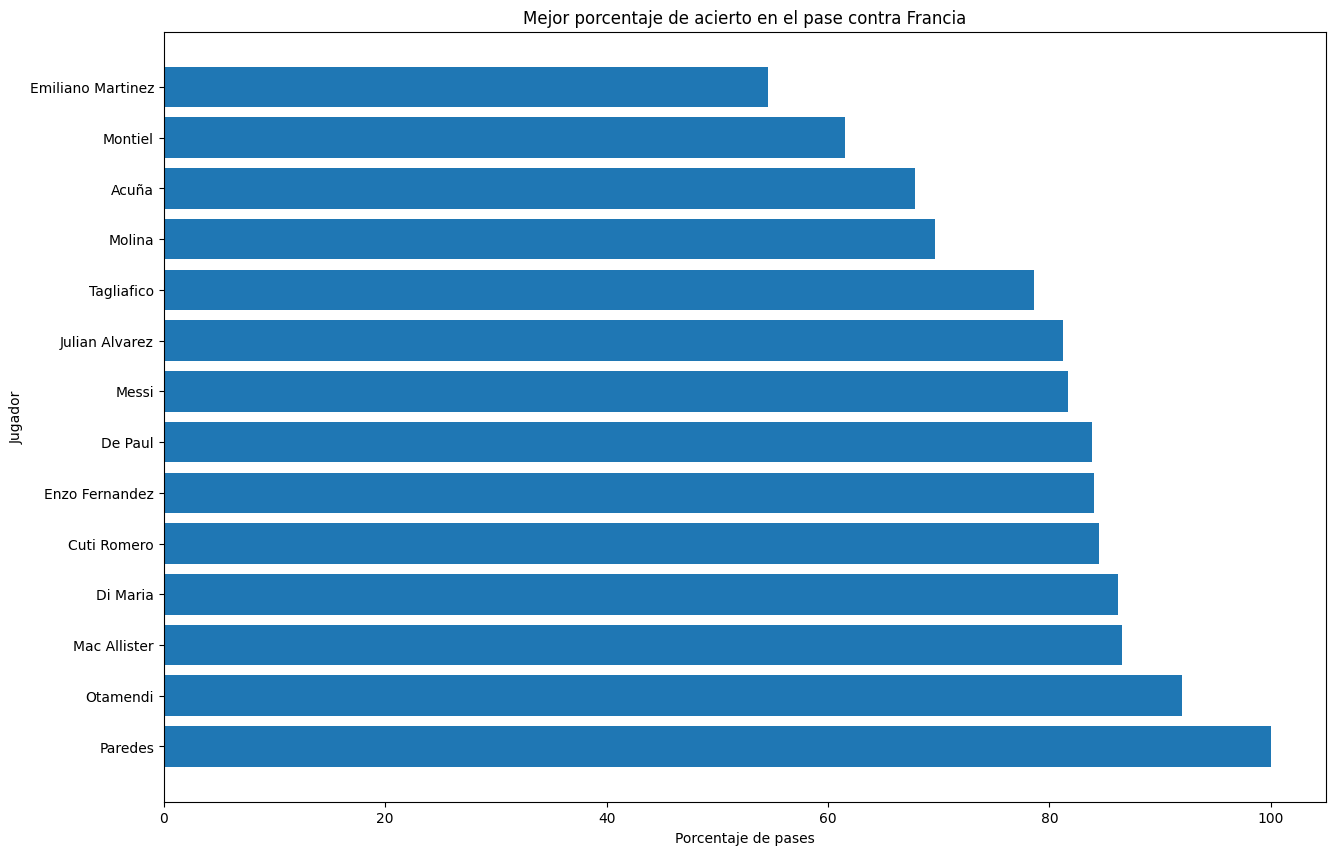

In [27]:
#Gráfico de barras horizontal
#Se puede cambiar a gráfica vertical utilizando ax.bar en lugar de ax.barh
fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
ax.barh(porcentaje['player'], porcentaje['% de acierto'])
plt.title('Mejor porcentaje de acierto en el pase contra Francia')
plt.xlabel("Porcentaje de pases")
plt.ylabel("Jugador")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

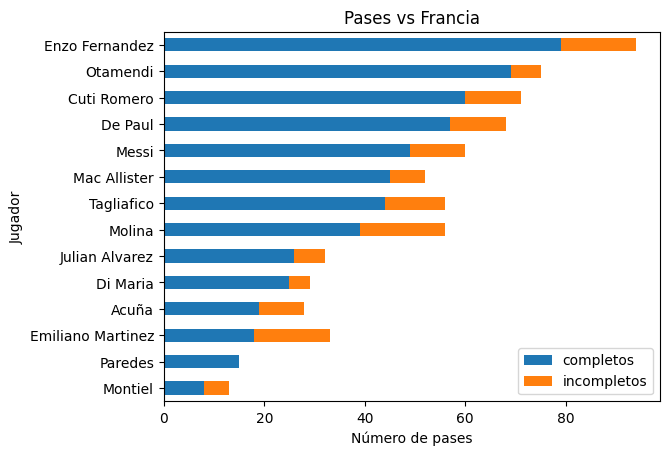

In [28]:
#Ahora sacamos los pases completos con los incompletos en una barra apilada
ax = pases_totales[['player', 'completos', 'incompletos']].sort_values('completos', ascending=True).plot.barh(x='player', stacked=True)
plt.title('Pases vs Francia')
plt.xlabel('Número de pases')
plt.ylabel('Jugador')
plt.show

In [29]:
#Hacemos gráficos de pases en campo de fútbol
white="white"
sbred='#e21017'
lightgrey='#d9d9d9'
darkgrey='#9A9A9A'
cmaplist = [white, darkgrey, sbred]
cmap = LinearSegmentedColormap.from_list("", cmaplist)

In [36]:
#Creamos una función para crear el mapa de calor y de pases

def passMap(player):

  player=player
  #Filtramos los pases solo del jugador seleccionado
  comp = pases_completos[(pases_completos["player"] == player)]
  incomp = pases_incompletos[(pases_incompletos["player"] == player)]

  #Dibujamos el campo de fulvo
  pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', line_zorder=2)

  fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
  fig.set_facecolor('white')

  #Contamos los pases por zona y coordenadas (x,y) de finalización de los pases para el mapa de calor
  #bins hace la división del campo en zonas
  bin_statistic = pitch.bin_statistic(comp.pass_end_x, comp.pass_end_y, statistic='count', bins=(12, 8), normalize=True)
  pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap=cmap)

  #Graficando las flechas de los pases de Messi
  pitch.arrows(comp.x, comp.y, comp.pass_end_x, comp.pass_end_y, width=3,
              headwidth=8, headlength=5, color=sbred, ax=ax, zorder=2, label='Pases completos')

  pitch.arrows(incomp.x, incomp.y, incomp.pass_end_x, incomp.pass_end_y, width=3,
              headwidth=8, headlength=5, color=darkgrey, ax=ax, zorder=2, label='Pases incompletos')

  #Etiquetas de color
  ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

  #Titulo
  ax_title = ax.set_title('Pases de ' f'{player} vs Francia', fontsize=30, color='black')

  plt.show()


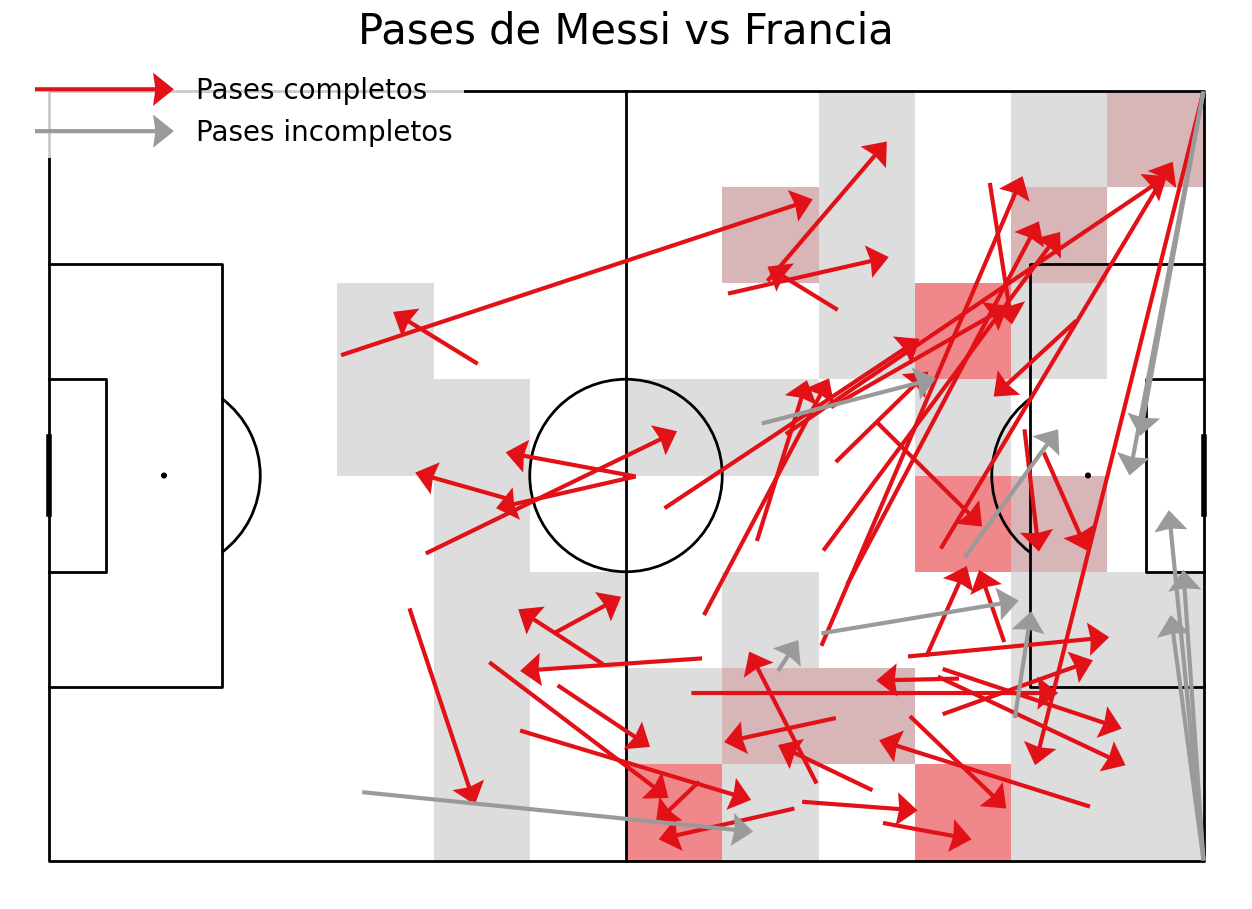

In [39]:
passMap('Messi')

In [ ]:
#Para crear el mismo tipo de mapa para diferentes jugadores se puede usar un bucle
for player in pases_totales['player'].unique():
  passMap(player)

In [42]:
#Pases en el último tercio
complete_f3 = pases_completos[pases_completos['pass_end_x'] >= 80]
incomplete_f3 = pases_incompletos[pases_incompletos['pass_end_x'] >= 80]
complete_f3 = complete_f3[complete_f3['x'] < 80]
incomplete_f3 = incomplete_f3[incomplete_f3['x'] < 80]

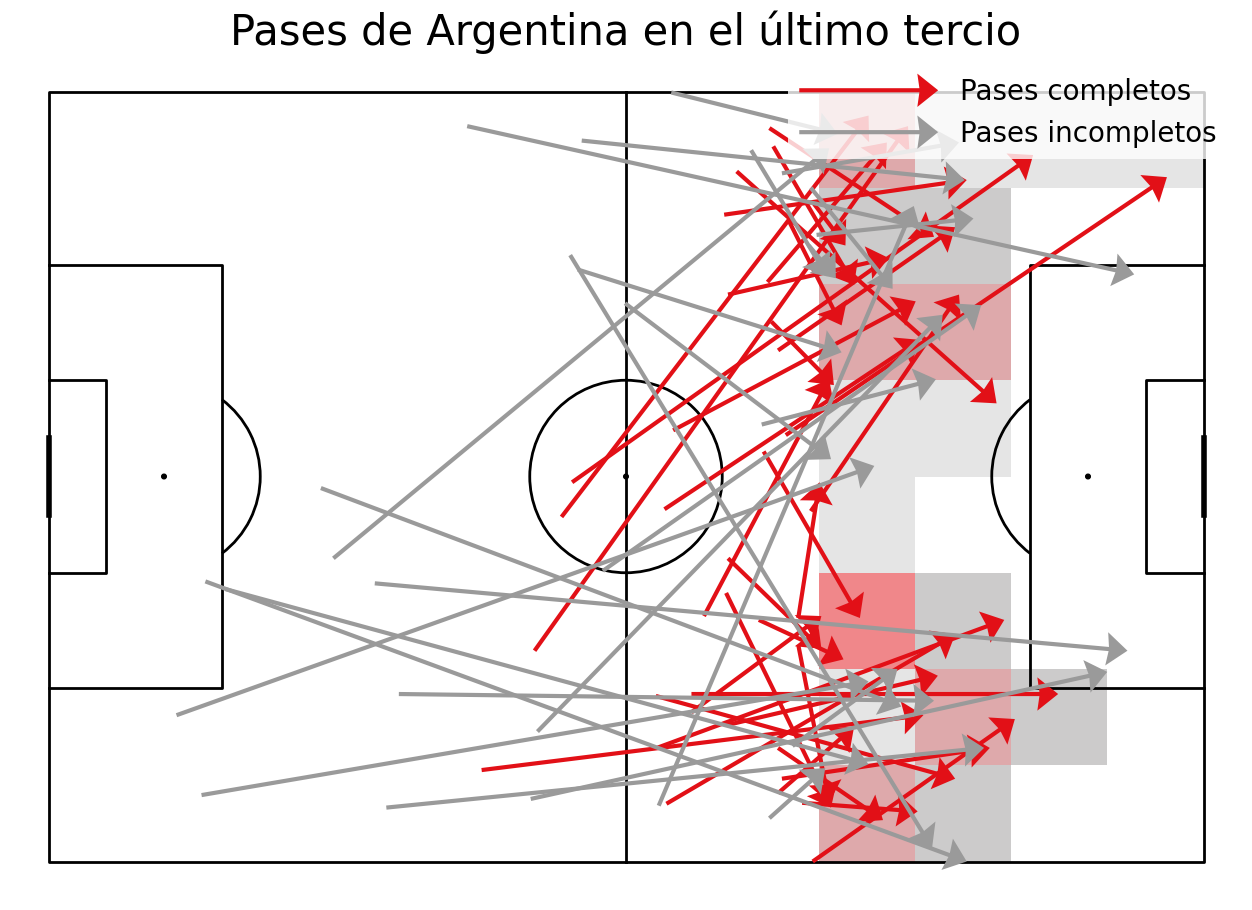

In [43]:
#Dibujamos el campo de fulvo
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', line_zorder=2)

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#Contamos los pases por zona y coordenadas (x,y) de finalización de los pases para el mapa de calor
#bins hace la división del campo en zonas
bin_statistic = pitch.bin_statistic(complete_f3.pass_end_x, complete_f3.pass_end_y, statistic='count', bins=(12, 8), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap=cmap)

#Graficando las flechas de los pases de Messi
pitch.arrows(complete_f3.x, complete_f3.y, complete_f3.pass_end_x, complete_f3.pass_end_y, width=3,
            headwidth=8, headlength=5, color=sbred, ax=ax, zorder=2, label='Pases completos')

pitch.arrows(incomplete_f3.x, incomplete_f3.y, incomplete_f3.pass_end_x, incomplete_f3.pass_end_y, width=3,
            headwidth=8, headlength=5, color=darkgrey, ax=ax, zorder=2, label='Pases incompletos')

#Etiquetas de color
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#Titulo
ax_title = ax.set_title('Pases de Argentina en el último tercio', fontsize=30, color='black')

plt.show()